### Ali Rahimi

# Librarires

In [15]:
import numpy as np
import random

from sklearn.datasets import fetch_california_housing

# Load Dataset

In [16]:
data = fetch_california_housing()
X = data.data
sample_numbers = 4000
indices = np.random.choice(X.shape[0], sample_numbers, replace=False)
x_data = X[indices]

# Implement KMeans algorithm (do not use any libraries and implement it from scratch)

In [17]:
class KMeans:
    def __init__(self, n_clusters=5, max_iter=1000):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def fit(self, X):
        random_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centroids = X[random_indices]

        for _ in range(self.max_iter):
            clusters = self._assign_clusters(X)
            new_centroids = self._compute_centroids(X, clusters)
            if np.all(new_centroids == self.centroids):
                break
            self.centroids = new_centroids

    def _assign_clusters(self, X):
        distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)

    def _compute_centroids(self, X, clusters):
        return np.array([X[clusters == i].mean(axis=0) for i in range(self.n_clusters)])

    def predict(self, X):
        distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)

# Use elbow method and silhouette method to choose optimal cluster numbers

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

def elbow_method(X, max_clusters=10):
    distortions = []
    for k in range(1, max_clusters+1):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        clusters = kmeans.predict(X)
        distortion = np.sum((X - kmeans.centroids[clusters])**2)
        distortions.append(distortion)
    plt.figure(figsize=(8, 4))
    plt.plot(range(1, max_clusters+1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Method')
    plt.show()

def silhouette_method(X, max_clusters=10):
    silhouette_scores = []
    for k in range(2, max_clusters+1):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        clusters = kmeans.predict(X)
        silhouette_avg = silhouette_score(X, clusters)
        silhouette_scores.append(silhouette_avg)
    plt.figure(figsize=(8, 4))
    plt.plot(range(2, max_clusters+1), silhouette_scores, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Method')
    plt.show()


# Compare your k means algorithm with sklearn k means algorithm (compare it with both elbow and silhouette method)

In [19]:
from sklearn.cluster import KMeans as SklearnKMeans

def compare_with_sklearn(X, max_clusters=10):
    distortions_custom = []
    distortions_sklearn = []
    silhouette_custom = []
    silhouette_sklearn = []

    for k in range(2, max_clusters+1):
        kmeans_custom = KMeans(n_clusters=k)
        kmeans_custom.fit(X)
        clusters_custom = kmeans_custom.predict(X)
        distortion_custom = np.sum((X - kmeans_custom.centroids[clusters_custom])**2)
        distortions_custom.append(distortion_custom)
        silhouette_avg_custom = silhouette_score(X, clusters_custom)
        silhouette_custom.append(silhouette_avg_custom)

        kmeans_sklearn = SklearnKMeans(n_clusters=k, random_state=0, n_init=10)
        clusters_sklearn = kmeans_sklearn.fit_predict(X)
        distortions_sklearn.append(kmeans_sklearn.inertia_)
        silhouette_avg_sklearn = silhouette_score(X, clusters_sklearn)
        silhouette_sklearn.append(silhouette_avg_sklearn)

    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.plot(range(2, max_clusters+1), distortions_custom, marker='o', label='Custom KMeans')
    plt.plot(range(2, max_clusters+1), distortions_sklearn, marker='o', label='Sklearn KMeans')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Method Comparison')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(2, max_clusters+1), silhouette_custom, marker='o', label='Custom KMeans')
    plt.plot(range(2, max_clusters+1), silhouette_sklearn, marker='o', label='Sklearn KMeans')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Method Comparison')
    plt.legend()

    plt.show()


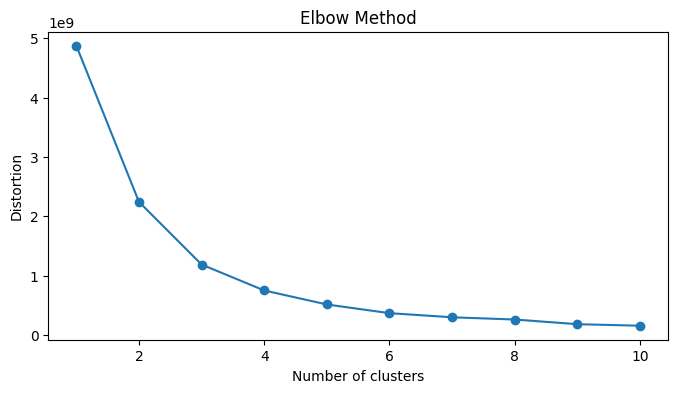

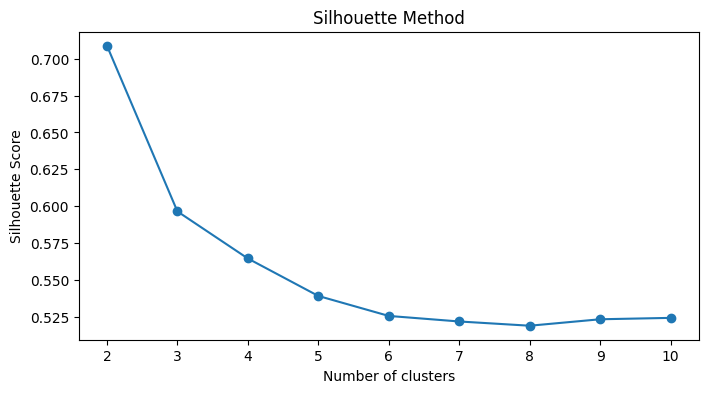

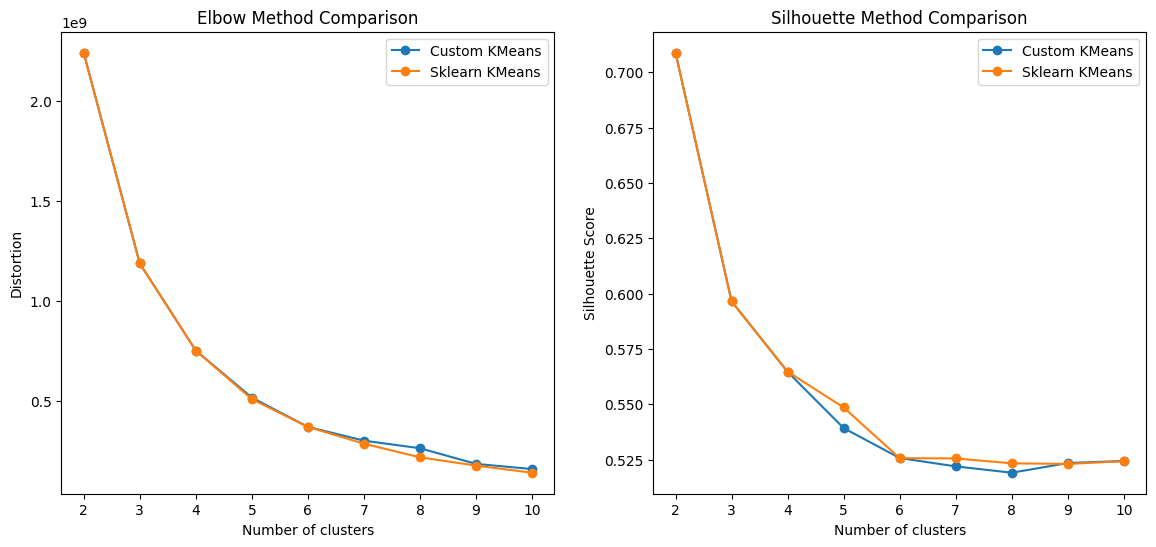

Optimal clusters based on Elbow method: 1
Optimal clusters based on Silhouette method: 2
Optimal clusters based on Elbow method (Sklearn): 1
Optimal clusters based on Silhouette method (Sklearn): 2


In [20]:
def find_optimal_clusters(distortions, silhouette_scores):
    optimal_clusters_elbow = np.argmin(np.diff(distortions)) + 1
    optimal_clusters_silhouette = np.argmax(silhouette_scores) + 2
    return optimal_clusters_elbow, optimal_clusters_silhouette

elbow_method(x_data)
silhouette_method(x_data)
compare_with_sklearn(x_data)

k_values = range(2, 11)
distortions_custom = []
silhouette_custom = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x_data)
    clusters = kmeans.predict(x_data)
    distortions_custom.append(np.sum((x_data - kmeans.centroids[clusters])**2))
    silhouette_custom.append(silhouette_score(x_data, clusters))

optimal_clusters_elbow, optimal_clusters_silhouette = find_optimal_clusters(distortions_custom, silhouette_custom)
print(f"Optimal clusters based on Elbow method: {optimal_clusters_elbow}")
print(f"Optimal clusters based on Silhouette method: {optimal_clusters_silhouette}")

distortions_sklearn = []
silhouette_sklearn = []
for k in k_values:
    kmeans_sklearn = SklearnKMeans(n_clusters=k, random_state=0, n_init=10)
    clusters = kmeans_sklearn.fit_predict(x_data)
    distortions_sklearn.append(kmeans_sklearn.inertia_)
    silhouette_sklearn.append(silhouette_score(x_data, clusters))

optimal_clusters_elbow_sklearn, optimal_clusters_silhouette_sklearn = find_optimal_clusters(distortions_sklearn, silhouette_sklearn)
print(f"Optimal clusters based on Elbow method (Sklearn): {optimal_clusters_elbow_sklearn}")
print(f"Optimal clusters based on Silhouette method (Sklearn): {optimal_clusters_silhouette_sklearn}")


### what is the optimal cluster number based on your custom kmeans algorithm and sklearn kmeans algorithm? if answer is different based on each algorithm then explain difference

In [ ]:
# The optimal cluster numbers are same in both custom KMeans algorithm and Sklearn KMeans algorithm.
# But if it was different, it could be because of differences in implementation details like how the initial centroids are chosen and convergence criteria.

### would you prefer elbow method for determining optimal cluster number or silhouette method?
#### I prefer silhouette method because in elbow method sometimes it's hard to say where is the elbow point but silhouette method is more deterministic rather than elbow method

In [20]:
# The elbow method is simpler and give us a point where adding more clusters does not reduce the distortion. But, silhouette method gives us better insight into the separation distance between the resulting clusters, so it is more reliable choice for determining the optimal number of clusters. So I prefer silhouette method, too.